# Bode Diagram

This notebook plots Bode diagrams (magnitude and phase) from tabular data.

Input two tables:
- **Magnitude table**: rows are individual components + total H(ω), columns are frequencies
- **Phase table**: same structure for phase in degrees

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Input Data

Edit the frequencies and table values below to match your problem.

Each row in the table corresponds to one component (or the total H(ω)).
Use `None` as the label for the total H(ω) row — it will be plotted with a thicker line.

In [16]:
frequencies = [0.1, 1, 5, 10, 100, 1e3, 2e3, 10e3, 100e3, 1e6, 10e6]

magnitude_table = {
    "1": [0,   0,  0,   0,   0,   0,   0,   0,    0,    0,    0],
    "2": [0,   0,  0,   6,  26,  46,  52,  66,   86,  106,  126],
    "3": [0,   0,  0,   0,   0,  20,  26,  40,   60,   80,  100],
    "4": [20,  0, -14, -20, -40, -60, -66, -80, -100, -120, -140],
    "5": [0,   0,  0,   0,   0,   0,   0, -14,  -34,  -54,  -74],
    "6": [0,   0,  0,   0,   0,   0,   0,   0,    0,  -20,  -40],
    None: [20,  0, -14, -14, -14,   6,  12,  12,   12,   -8,  -28],
}

phase_table = {
    "1": [180, 180, 180, 180, 180, 180, 180, 180,  180,  180,  180],
    "2": [0,    14,  45,  51,  90,  90,  90,  90,   90,   90,   90],
    "3": [0,     0,   0,   0,  45,  90,  90,  90,   90,   90,   90],
    "4": [-90,  -90, -90, -90, -90, -90, -90, -90,  -90,  -90,  -90],
    "5": [0,     0,   0,   0,   0, -31, -45, -76,  -90,  -90,  -90],
    "6": [0,     0,   0,   0,   0,   0,   0,   0,  -45,  -90,  -90],
    None: [90,  104, 135, 141, 225, 239, 225, 194,  135,   90,   90],
}

## 2. Bode Plots

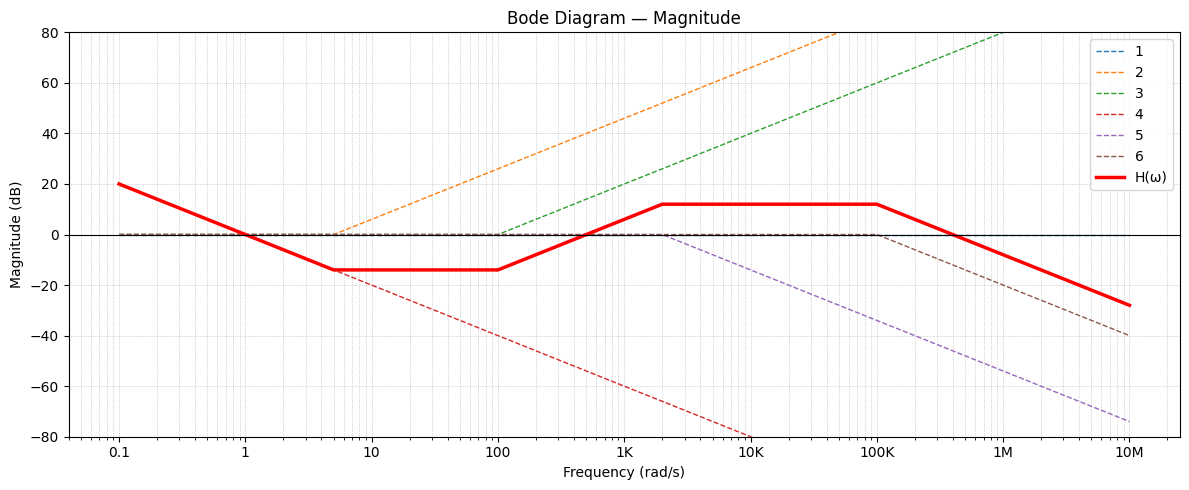

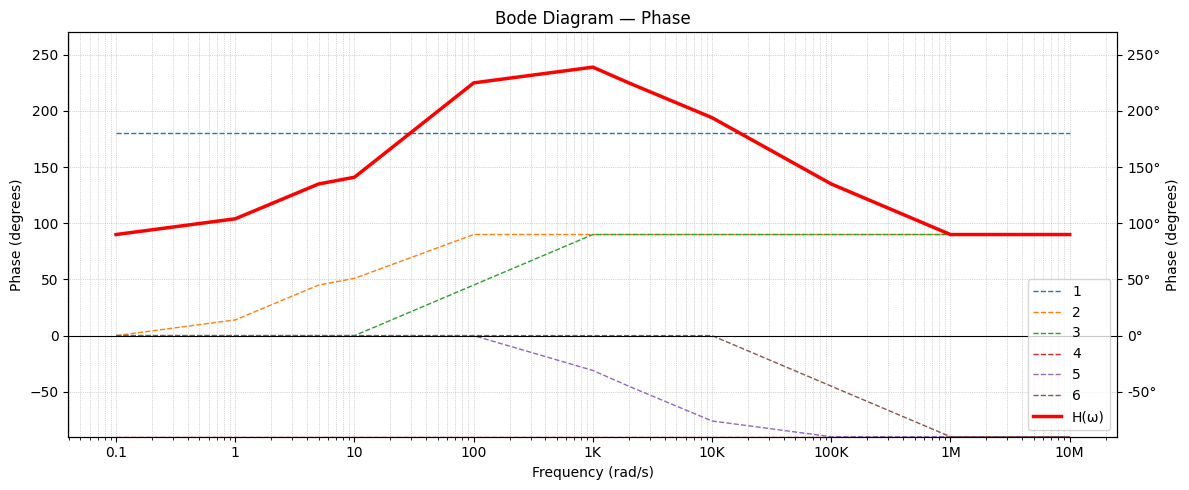

In [17]:
def plot_bode(frequencies, table, ylabel, title, ylim=None, degree_symbols=False):
    fig, ax = plt.subplots(figsize=(12, 5))
    freq = np.array(frequencies)

    for label, values in table.items():
        if label is None:
            ax.semilogx(freq, values, color="red", linewidth=2.5, label="H(ω)")
        else:
            ax.semilogx(freq, values, linewidth=1, linestyle="--", label=label)

    ax.axhline(0, color="black", linewidth=0.8)
    ax.set_xlabel("Frequency (rad/s)")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="best")
    ax.grid(True, which="both", linestyle=":", linewidth=0.5)

    tick_freqs = [0.1, 1, 10, 100, 1e3, 10e3, 100e3, 1e6, 10e6]
    tick_labels = ["0.1", "1", "10", "100", "1K", "10K", "100K", "1M", "10M"]
    ax.set_xticks(tick_freqs)
    ax.set_xticklabels(tick_labels)

    if ylim is not None:
        ax.set_ylim(ylim)

    if degree_symbols:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        yticks = ax.get_yticks()
        yticks = [t for t in yticks if ax.get_ylim()[0] <= t <= ax.get_ylim()[1]]
        ax_right.set_yticks(yticks)
        ax_right.set_yticklabels([f"{int(t)}°" for t in yticks])
        ax_right.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()


magnitude_ylim = (-80, 80)    # adjust as needed
phase_ylim = (-90, 270)       # adjust as needed

plot_bode(frequencies, magnitude_table, "Magnitude (dB)", "Bode Diagram — Magnitude", ylim=magnitude_ylim)
plot_bode(frequencies, phase_table, "Phase (degrees)", "Bode Diagram — Phase", ylim=phase_ylim, degree_symbols=True)